In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.integrate import quad

def compare_rhos(rhos: list[float], filename_prefix: str) -> None:

    # Define the range [a, b]
    a, b = 0.01, 10  # avoid zero to prevent division issues
    x = np.linspace(a, b, 500)

    # Probability function
    with plt.style.context(["science"]):

        # Plot f(x) for each value of rho
        plt.figure(figsize=(10, 6))
        for d in rhos:
            y = 1 / (x ** d)

            d_color = plt.cm.viridis((d-min(rhos)) / (max(rhos)-min(rhos)))

            plt.plot(x, y, label=r"$\rho = ${d}", linestyle = "--", color = d_color)

        plt.xlabel(r"$x$")
        plt.ylabel(r"$f(x)$")
        plt.title(r"Probability Measure $f_{\rho}(x) = \frac{1}{x^{\rho}}$")
        plt.ylim(0, 2)
        plt.xlim(0,4)
        plt.legend()
        plt.grid(True)
        plt.savefig(filename_prefix + "_prob_measure.png", dpi = 300)
        plt.show()
        plt.close()


    # Distribution function
    with plt.style.context(["science"]):

        sorted_rhos = sorted(rhos, reverse=True)

        plt.figure(figsize=(10, 6))

        for d in sorted_rhos:

            f_x = lambda x,d: 1/(x**d)

            # Compute the normalizing constant Z
            normalization_constant, _ = quad(f_x, a, b, args=(d))

            normalized_f_x = lambda x,d: (1/(x**d)) * (1/normalization_constant)

            # Compute the cumulative integral F(x) for each x in the range
            F_x = []
            for x_value in x:
                F_x_value, _ = quad(normalized_f_x, a, x_value, args=(d))
                F_x.append(F_x_value)
            F_x = np.array(F_x)

            d_color = plt.cm.viridis((d-min(rhos)) / (max(rhos)-min(rhos)))

            # Plot F(x)
            plt.plot(x, F_x, label=r"$\rho = $"+str(d), color = d_color)
            
            # Gradient fill by filling smaller sections with progressively lighter colors
            num_sections = 500  # Number of gradient sections
            for i in range(num_sections):
                # Range for this section
                start = int(i * len(x) / num_sections)
                end = int((i + 1) * len(x) / num_sections)
                alpha_value = (num_sections-i)/num_sections
                plt.fill_between(x[start:end], F_x[start:end], color=d_color, alpha=alpha_value)

        # Add labels and legend
        plt.xlabel(r"$x$")
        plt.ylabel(r"$f(x)$")
        plt.title(r"Distribution $F_{\rho}(x) = f((0,x])$")
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.savefig(filename_prefix + "_distribution.png", dpi = 300)
        plt.show()
        plt.close()


    # Tail function
    with plt.style.context(["science"]):

        sorted_rhos = sorted(rhos, reverse=False)

        plt.figure(figsize=(10, 6))

        for d in sorted_rhos:

            f_x = lambda x,d: 1/(x**d)

            # Compute the normalizing constant Z
            normalization_constant, _ = quad(f_x, a, b, args=(d))

            normalized_f_x = lambda x,d: (1/(x**d)) * (1/normalization_constant)

            # Compute the tail for each x in the range
            T_x = []
            for x_value in x:
                T_x_value, _ = quad(normalized_f_x, x_value, b, args=(d))
                T_x.append(T_x_value)
            T_x = np.array(T_x)

            d_color = plt.cm.viridis((d-min(rhos)) / (max(rhos)-min(rhos)))

            # Plot F(x)
            plt.plot(x, T_x, label=r"$\rho = $"+str(d), color = d_color)
            
            # Gradient fill by filling smaller sections with progressively lighter colors
            num_sections = 500  # Number of gradient sections
            for i in range(num_sections):
                # Range for this section
                start = int(i * len(x) / num_sections)
                end = int((i + 1) * len(x) / num_sections)
                alpha_value = (num_sections-i)/num_sections
                plt.fill_between(x[start:end], T_x[start:end], color=d_color, alpha=alpha_value)

        # Add labels and legend
        plt.xlabel(r"$x$")
        plt.ylabel(r"$f(x)$")
        plt.title(r"Tail $T_{\rho}(x) = f([x,+\infty))$")
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.savefig(filename_prefix + "_tail.png", dpi = 300)
        plt.show()
        plt.close()


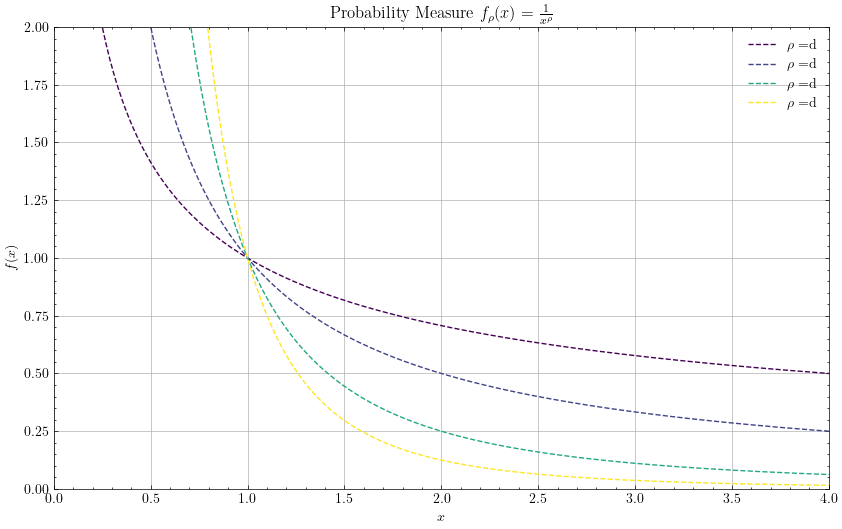

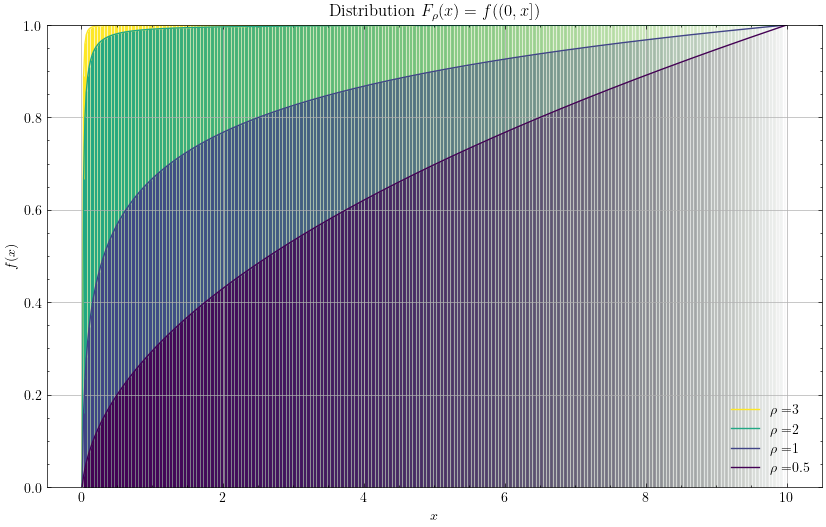

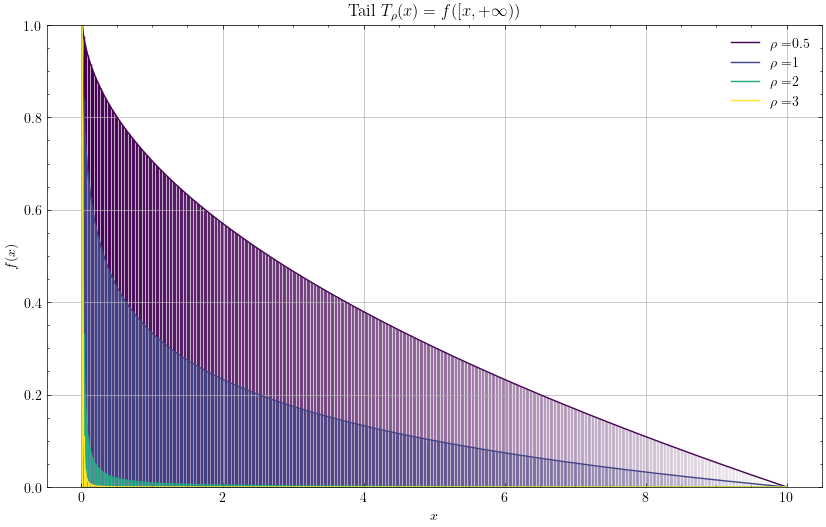

In [62]:
compare_rhos([0.5, 1, 2, 3], filename_prefix="05_to_3")

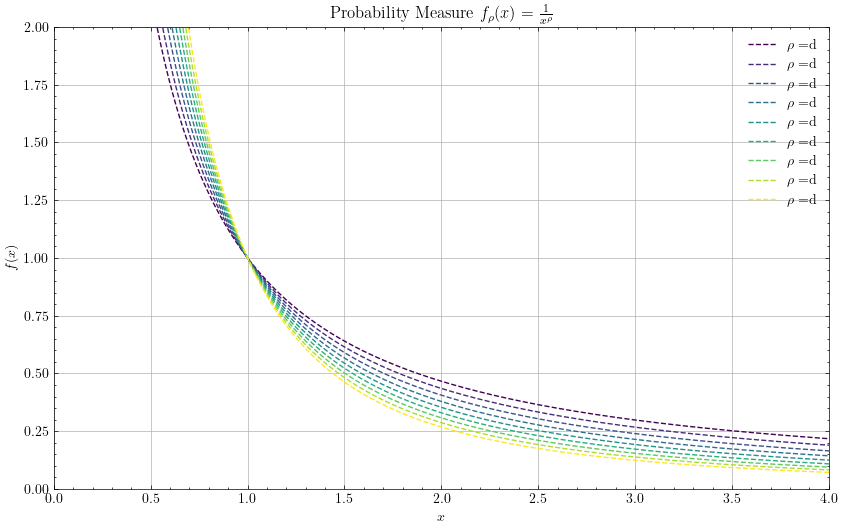

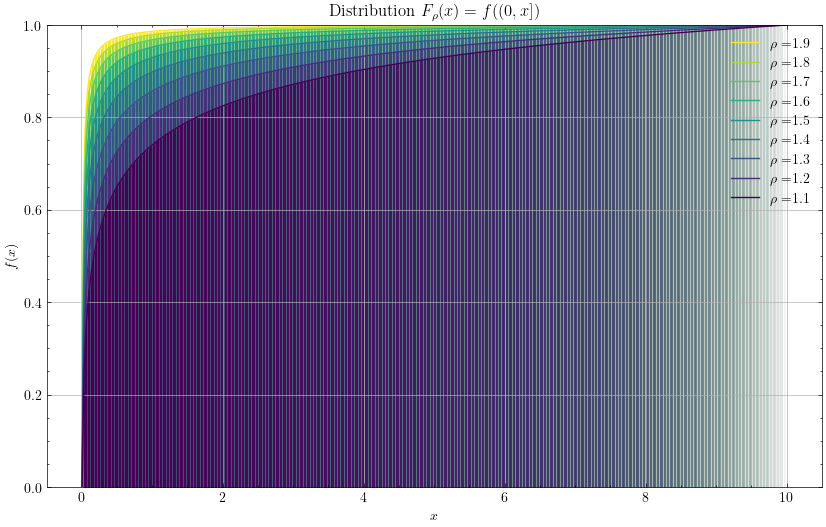

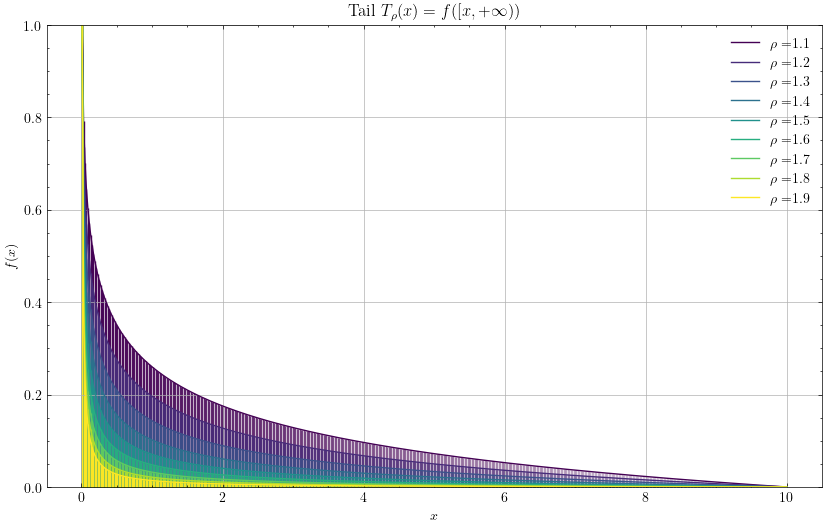

In [59]:
compare_rhos([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9], filename_prefix="1_to_2")